In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from utilsforecast.plotting import plot_series 
from coreforecast.scalers import boxcox, boxcox_lambda
from tsfeatures import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import STL, MSTL
from statsforecast import StatsForecast
sns.set_style("whitegrid")
plt.style.use("ggplot")
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "figure.constrained_layout.use": True,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "legend.title_fontsize": 10,
})

warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv(f'../DATA/PBS.csv')
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')
df = df.drop('Unnamed: 0', axis=1)
df['unique_id'] = df['ATC2'] + '_' + df['Concession'] + '_' + df['Type']
df['y'] = df['Cost']
df.head()

,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost,unique_id,y
Month,,,,,,,,,,
1991-07-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228,67877.0,A01_Concessional_Co-payments,67877.0
1991-08-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327,57011.0,A01_Concessional_Co-payments,57011.0
1991-09-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775,55020.0,A01_Concessional_Co-payments,55020.0
1991-10-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380,57222.0,A01_Concessional_Co-payments,57222.0
1991-11-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371,52120.0,A01_Concessional_Co-payments,52120.0


In [16]:
all_features = [
    acf_features,
    arch_stat,
    crossing_points,
    entropy,
    flat_spots,
    heterogeneity,
    holt_parameters,
    lumpiness,
    nonlinearity,
    pacf_features,
    stl_features,
    stability,
    hw_parameters,
    unitroot_kpss,
    unitroot_pp,
    series_length,
    hurst,
]
all_feat = tsfeatures(df[['unique_id','y']], freq=12, features=all_features)
all_feat = all_feat.set_index('unique_id')

In [76]:
scaled = StandardScaler().set_output(transform='pandas').fit_transform(all_feat)

col = ['arch_acf',
'garch_acf',
'arch_r2',
'garch_r2']

scaled = scaled.drop(columns=col)
scaled = scaled.dropna()
scaled[['PCA1', 'PCA2']] = PCA(n_components=2).fit_transform(scaled)
scaled[['ATC','Concession','Type']] = list(scaled.index.str.split('_'))
scaled['Concession_Type'] = scaled['Concession'] + '_' + scaled['Type']

<Axes: xlabel='PCA1', ylabel='PCA2'>

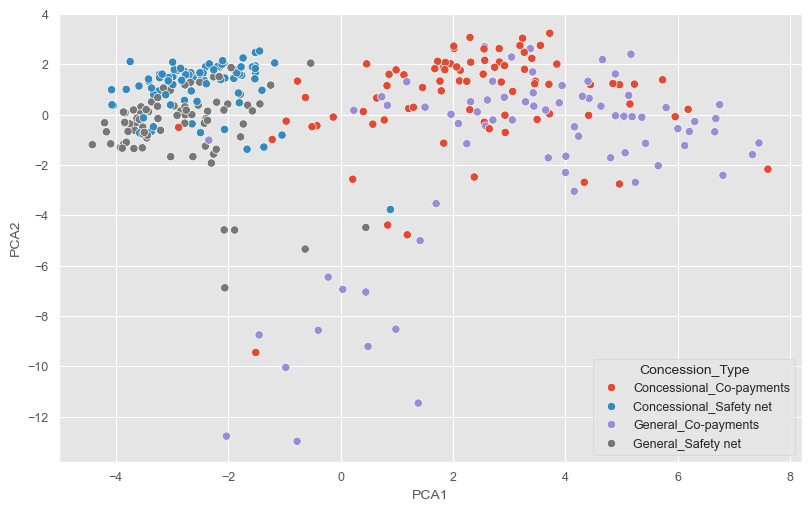

In [77]:
sns.scatterplot(scaled, x='PCA1' , y='PCA2', hue='Concession_Type')

In [85]:
scaled['Group'] = scaled['PCA2'].apply(lambda x: x<=-8)

In [ ]:
sns.pairplot(scaled, hue='Group')